In [17]:
import csv
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## STU Expansion

In [18]:
# Opening data
with open("results/STU96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_stu = []
spell_stu = []
dtin_stu = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_stu.append(float(row[0]))
        spell_stu.append(float(row[1]))
        dtin_stu.append(int(row[2]))
        
first_spell_stu = []
second_spell_stu = []
for idx in range(len(days_stu)):
    if spell_stu[idx]==1:
        first_spell_stu.append(days_stu[idx])
    elif spell_stu[idx]==2:
        second_spell_stu.append(days_stu[idx])

In [19]:
# Opening data
with open("results/Upper96_7.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_stu = []
spell_stu = []
dtin_stu = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_stu.append(float(row[0]))
        spell_stu.append(float(row[1]))
        dtin_stu.append(int(row[2]))
        
first_spell_stu_7 = []
second_spell_stu_7 = []
for idx in range(len(days_stu)):
    if spell_stu[idx]==1:
        first_spell_stu_7.append(days_stu[idx])
    elif spell_stu[idx]==2:
        second_spell_stu_7.append(days_stu[idx])

## Non-Employment

In [20]:
# Opening data
with open("results/NE96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_ne = []
spell_ne = []
dtin_ne = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_ne.append(float(row[0]))
        spell_ne.append(float(row[1]))
        dtin_ne.append(int(row[2]))
        
first_spell_ne = []
second_spell_ne = []
for idx in range(len(days_ne)):
    if spell_ne[idx]==1:
        first_spell_ne.append(days_ne[idx])
    elif spell_ne[idx]==2:
        second_spell_ne.append(days_ne[idx])

In [5]:
dat_ne = pd.read_csv("results/NE96.csv")
dat_ne[dat_ne.real_days_1<=31].recall.value_counts()

0    212500
1    152143
Name: recall, dtype: int64

In [6]:
dat_ne.head()

,real_days_1,n_spell_u,recall,U_ghost,yin
0,244,1,0,1,2000
1,274,2,0,1,2001
2,22,1,0,0,1996
3,6,2,0,1,1996
4,2,1,1,1,1994


In [7]:
152143/(152143+212500)

0.4172382302690577

In [8]:
dat_ne[np.logical_and(dat_ne.real_days_1<=31,dat_ne.U_ghost==1)].recall.value_counts()

0    183851
1    152143
Name: recall, dtype: int64

In [9]:
dat_ne[dat_ne.U_ghost==1].real_days_1.describe()

count    625497.000000
mean        134.352584
std         337.011979
min           2.000000
25%           6.000000
50%          25.000000
75%         109.000000
max        6143.000000
Name: real_days_1, dtype: float64

In [10]:
dat_ne[dat_ne.U_ghost==0].real_days_1.describe()

count    243551.000000
mean        304.989727
std         442.496783
min           1.000000
25%          64.000000
50%         161.000000
75%         362.000000
max        6348.000000
Name: real_days_1, dtype: float64

## Spell Adjustment

In [5]:
# Opening data
with open("results/Upper96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_SAdj = []
spell_SAdj = []
dtin_SAdj = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_SAdj.append(float(row[0]))
        spell_SAdj.append(float(row[1]))
        dtin_SAdj.append(int(row[2]))
        
first_spell_SAdj = []
second_spell_SAdj = []
for idx in range(len(days_SAdj)):
    if spell_SAdj[idx]==1:
        first_spell_SAdj.append(days_SAdj[idx])
    elif spell_SAdj[idx]==2:
        second_spell_SAdj.append(days_SAdj[idx])

In [12]:
dat_stu = pd.read_csv("results/Upper96.csv")
dat_stu

,real_days_1,n_spell_u,yin,blank_type,U_ghost
0,244,1,2000,SE,1
1,274,2,2001,SE,1
2,23,1,1996,NaN,0
3,6,2,1996,short,1
4,780,1,1996,NaN,0
...,...,...,...,...,...
667055,50,2,2001,quit,1
667056,6,1,2003,short,1
667057,61,2,2007,NaN,0
667058,14,1,2001,short,1


In [13]:
dat_blanks = dat_stu[dat_stu.U_ghost==1].copy()
dat_blanks.real_days_1.describe()

count    364272.000000
mean        163.208092
std         369.547515
min           2.000000
25%           8.000000
50%          35.000000
75%         147.000000
max        5907.000000
Name: real_days_1, dtype: float64

In [14]:
dat_reg = dat_stu[dat_stu.U_ghost==0].copy()
dat_reg.real_days_1.describe()

count    302788.000000
mean        301.541607
std         450.240595
min           1.000000
25%          64.000000
50%         158.000000
75%         352.000000
max       11668.000000
Name: real_days_1, dtype: float64

In [15]:
dat_blanks[dat_blanks.blank_type=='SE'].real_days_1.describe()

count    38831.000000
mean       299.911128
std        505.380565
min          2.000000
25%         32.000000
50%        121.000000
75%        311.000000
max       5669.000000
Name: real_days_1, dtype: float64

In [16]:
dat_blanks[dat_blanks.blank_type=='short'].real_days_1.describe()['mean']

177.6266258460176

In [16]:
dat_ru = pd.read_csv("results/LLower96.csv")
dat_ltu = pd.read_csv("results/Lower96.csv")
dat_stu = pd.read_csv("results/Upper96.csv")
dat_ne = pd.read_csv("results/NE96.csv")
dat_ltu['gaps'] = dat_ltu.Ldays - dat_ltu.LLdays

In [18]:
dat_ltu[np.logical_or(np.logical_and(dat_ltu.Ldays<=30].describe().loc['count'][0]

SyntaxError: invalid syntax (<ipython-input-18-c362effdf64e>, line 1)

In [ ]:
dat_ltu[dat_ltu.Ldays>30].describe().loc['count'][0]

In [ ]:
dat_ltu[dat_ltu.Ldays<=30].describe().loc['count'][0]/(dat_ltu[dat_ltu.Ldays<=30].describe().loc['count'][0]+dat_ltu[dat_ltu.Ldays>30].describe().loc['count'][0])

In [ ]:
dat_stu.head()

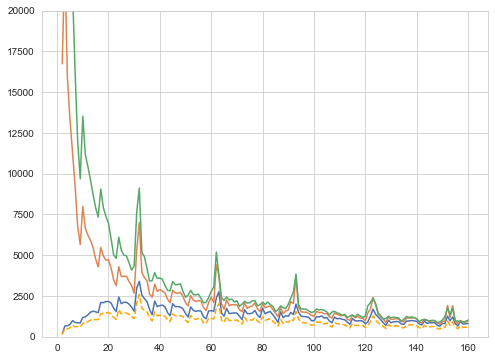

In [239]:
dat_stu_noq = dat_stu[dat_stu.blank_type!='quit'].copy()
dat_stu_ui = dat_stu[dat_stu.U_ghost==0].copy()

plt.figure(figsize=(8,6))
plt.plot(dat_ltu[np.logical_and(dat_ltu.Ldays>=2,dat_ltu.Ldays<=160)].Ldays.value_counts().sort_index())
plt.plot(dat_stu[np.logical_and(dat_stu.real_days_1>=2,dat_stu.real_days_1<=160)].real_days_1.value_counts().sort_index())
plt.plot(dat_stu_ui[np.logical_and(dat_stu_ui.real_days_1>=2,
                                    dat_stu_ui.real_days_1<=160)].real_days_1.value_counts().sort_index(),
        c='orange',ls='--')
plt.plot(dat_ne[np.logical_and(dat_ne.real_days_1>=2,dat_ne.real_days_1<=160)].real_days_1.value_counts().sort_index())
plt.ylim(0,20000)

plt.show()

In [ ]:
dat_ltu[np.logical_and(dat_ltu.Ldays>=15,dat_ltu.Ldays<=45)].Ldays.value_counts

In [308]:
np.sum(dat_ne.recall.value_counts())

869048

In [33]:
names = ['RU', 'LTU', 'STU', 'other', 'NE']
df_describe_dur = pd.DataFrame(dat_ru.LLdays.describe())
df_describe_dur.rename(columns={'LLdays':'RU'},inplace=True)
# df_describe_dur['LTU'] = dat_ltu.Ldays.describe()
# df_describe_dur['STU'] = dat_stu.real_days_1.describe()
# df_describe_dur['NE'] = dat_ne.real_days_1.describe()
df_describe_dur['LTU blanks'] = dat_ltu[dat_ltu['gaps']>1]['gaps'].describe()
df_describe_dur['STU blanks'] = dat_stu[dat_stu.U_ghost==1].real_days_1.describe()
df_describe_dur['NE blanks'] = dat_ne[dat_ne.U_ghost==1].real_days_1.describe()
df_describe_dur.rename(index={'count':'N'},inplace=True)

In [27]:
table_durs = df_describe_dur.loc[['mean','std','50%','N']].round(2)


In [34]:
print(df_describe_dur.loc[['mean','std','50%','N']].round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &         RU &  LTU blanks &  STU blanks &  NE blanks \\
\midrule
mean &     190.76 &      171.98 &      163.21 &     134.35 \\
std  &     257.33 &      358.83 &      369.55 &     337.01 \\
50\%  &     120.00 &       50.00 &       35.00 &      25.00 \\
N    &  430272.00 &   130755.00 &   364272.00 &  625497.00 \\
\bottomrule
\end{tabular}



In [170]:
names = ['RU', 'All blanks', 'SE', 'quit', 'short']


In [153]:
dat_blanks[dat_blanks.blank_type=='quit'].real_days_1.describe()

count    117703.000000
mean         92.661096
std         271.134165
min           2.000000
25%           5.000000
50%          14.000000
75%          62.000000
max        5483.000000
Name: real_days_1, dtype: float64

## LTU Expansion

In [27]:
# Opening data
with open("results/Lower96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days2 = []
spell2 = []
dtin2 = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days2.append(float(row[0]))
        spell2.append(float(row[2]))
        dtin2.append(int(row[3]))

first_spell2 = []
second_spell2 = []
for idx in range(len(days2)):
    if spell2[idx]==1:
        first_spell2.append(days2[idx])
    elif spell2[idx]==2:
        second_spell2.append(days2[idx])

## Raw data

In [22]:
# Opening data
with open("results/LLower96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days3 = []
spell3 = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days3.append(float(row[0]))
        spell3.append(float(row[1]))
        
first_spell3 = []
second_spell3 = []
for idx in range(len(days3)):
    if spell3[idx]==1:
        first_spell3.append(days3[idx])
    elif spell3[idx]==2:
        second_spell3.append(days3[idx])

# Plots

In [30]:
sns.set_style("whitegrid")

week_range = np.arange(0,1092,7)

# LTU
data_21, bins21 = np.histogram(first_spell2,week_range)
data_22, bins22 = np.histogram(second_spell2,week_range)

# Raw
data_31, bins31 = np.histogram(first_spell3,week_range)
data_32, bins32 = np.histogram(second_spell3,week_range)

# STU
data_stu, bins_stu = np.histogram(first_spell_SAdj,week_range)
data_stu2, bins_stu2 = np.histogram(second_spell_SAdj,week_range)

# STU - no adj
data_stu_noadj, bins_stu = np.histogram(first_spell_stu,week_range)
data_stu2_noadj, bins_stu2 = np.histogram(second_spell_stu,week_range)

# STU
data_stu_7, bins_stu_7 = np.histogram(first_spell_stu_7,week_range)
data_stu2_7, bins_stu2_7 = np.histogram(second_spell_stu_7,week_range)

# NE
data_ne, bins_ne = np.histogram(first_spell_ne,week_range)
data_ne2, bins_ne2 = np.histogram(second_spell_ne,week_range)

data_21 = data_21 / float(sum(data_21))
data_31 = data_31 / float(sum(data_31))
data_stu = data_stu / float(sum(data_stu))
data_ne = data_ne / float(sum(data_ne))

data_22 = data_22 / float(sum(data_22))
data_32 = data_32 / float(sum(data_32))
data_stu2 = data_stu2 / float(sum(data_stu2))
data_ne2 = data_ne2 / float(sum(data_ne2))
data_stu_7 = data_stu_7 / float(sum(data_stu_7))
data_stu_noadj = data_stu_noadj / float(sum(data_stu_noadj))

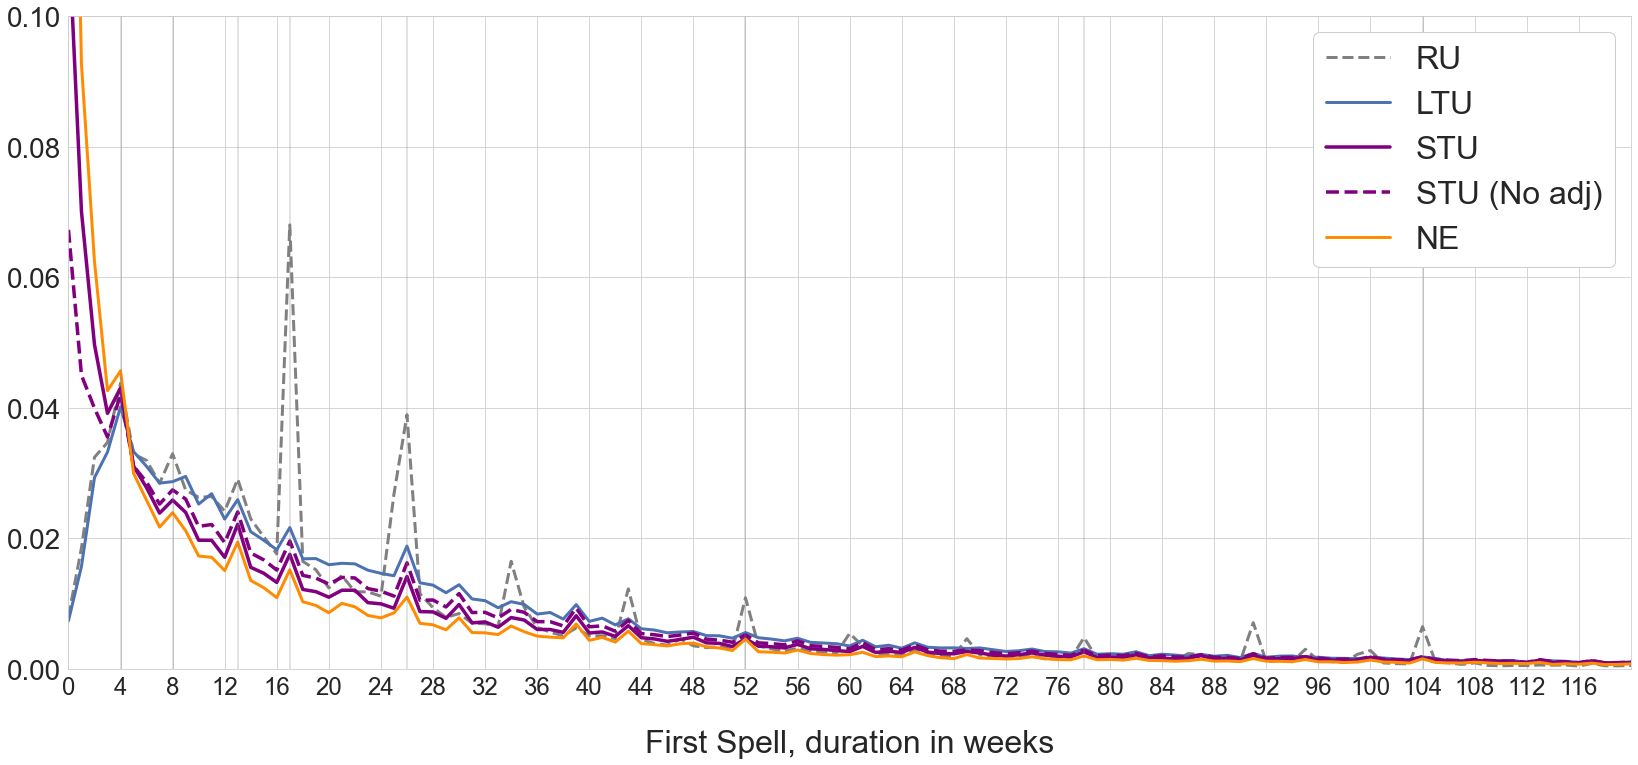

In [31]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)
cls = list(sns.color_palette())

plt.plot(data_31,  lw=3, label='RU',ls='--',c='grey')
plt.plot(data_21,lw=3, label='LTU')
plt.plot(data_stu, lw= 3.5, label='STU',c='purple' ) #c='red' 
plt.plot(data_stu_noadj, lw= 3.5, label='STU (No adj)',c='purple',ls='--' ) #c='red' 
plt.plot(data_ne, lw= 3, label='NE',c='darkorange') #c='darkorange'

plt.legend(loc='best', framealpha=1.0, fontsize=32)
# plt.xticks(spikes,fontsize=28)
plt.xticks(np.arange(0,120,4),fontsize=24)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='grey', alpha=.3)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32, labelpad=30 )
plt.ylim(0,0.10)

# plt.savefig("./plots/All_histogram.eps", format="eps", bbox_inches='tight')

plt.show()

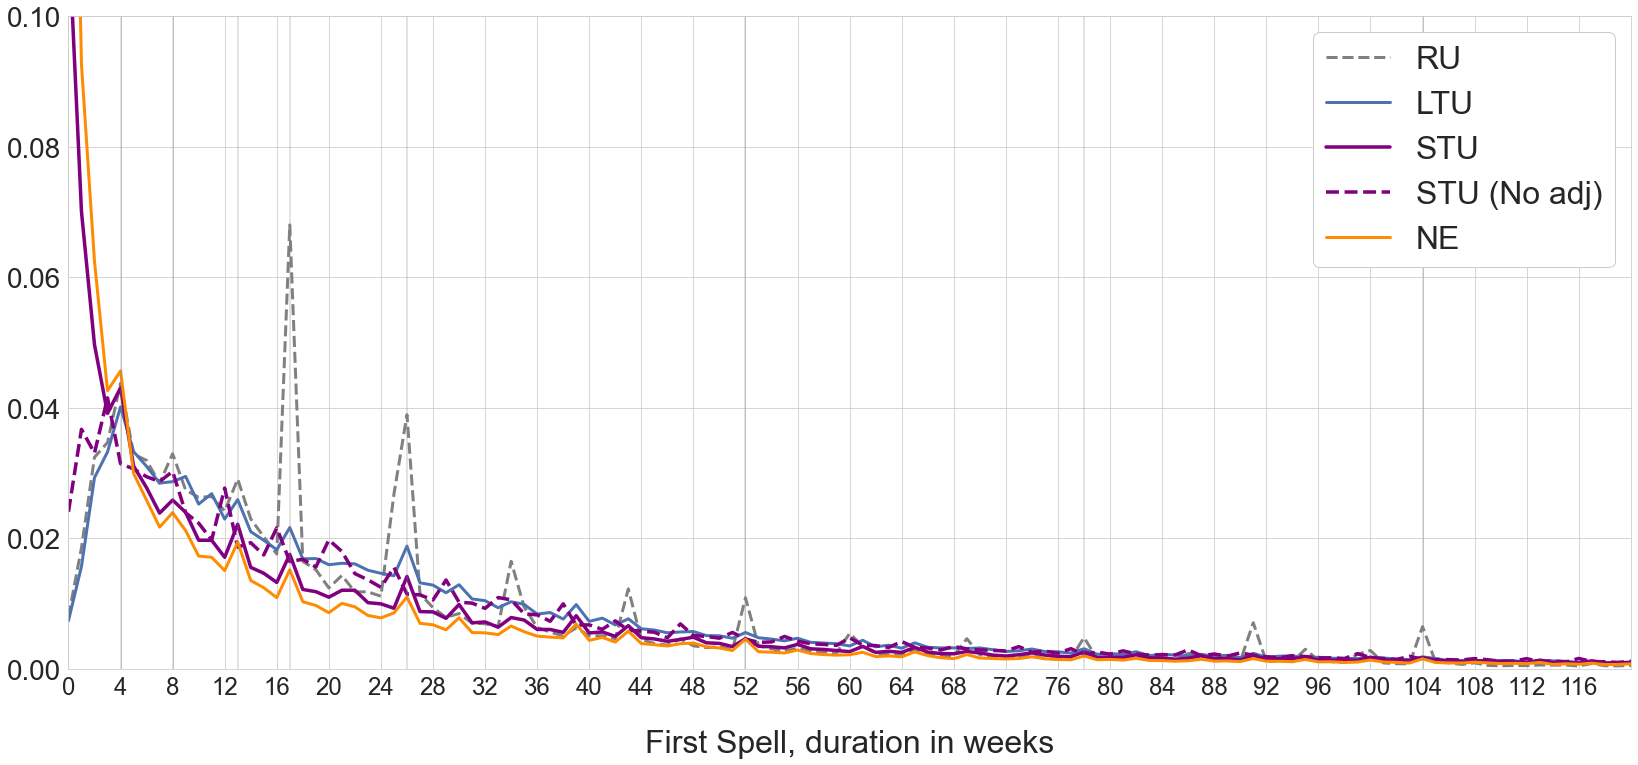

In [288]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)
cls = list(sns.color_palette())

plt.plot(data_31,  lw=3, label='RU',ls='--',c='grey')
plt.plot(data_21,lw=3, label='LTU')
plt.plot(data_stu, lw= 3.5, label='STU',c='purple' ) #c='red' 
plt.plot(data_stu_noadj, lw= 3.5, label='STU (No adj)',c='purple',ls='--' ) #c='red' 
plt.plot(data_ne, lw= 3, label='NE',c='darkorange') #c='darkorange'

plt.legend(loc='best', framealpha=1.0, fontsize=32)
# plt.xticks(spikes,fontsize=28)
plt.xticks(np.arange(0,120,4),fontsize=24)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='grey', alpha=.3)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32, labelpad=30 )
plt.ylim(0,0.10)

# plt.savefig("./plots/All_histogram.eps", format="eps", bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


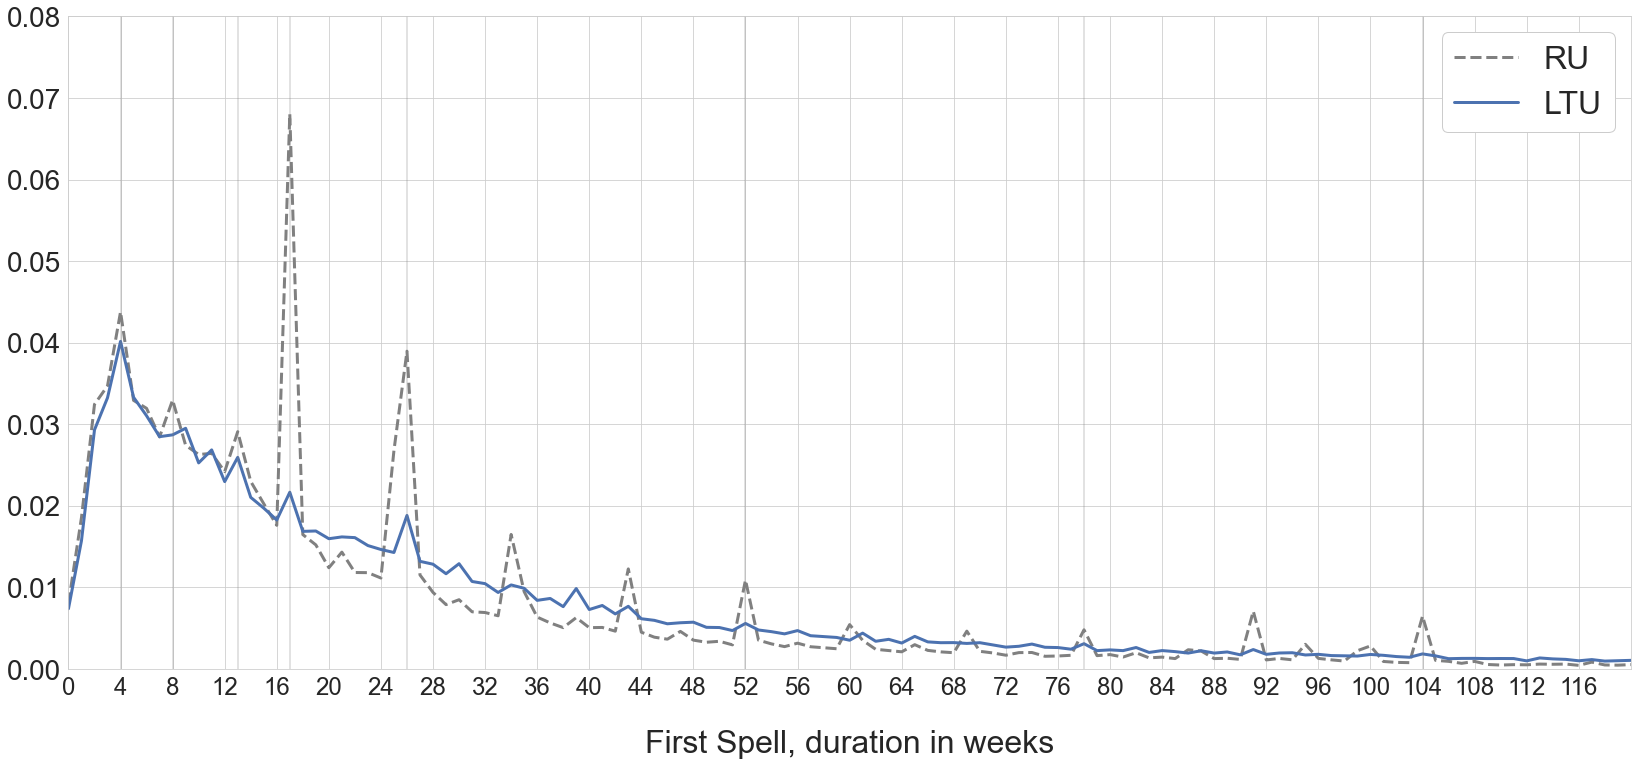

In [88]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)

cls = list(sns.color_palette())

plt.plot(data_31,  lw=3, label='RU',ls='--',c='grey')
plt.plot(data_21,lw=3, label='LTU')
# plt.plot(data_stu, lw= 3.5, label='STU Expansion', ) #c='red' 
# plt.plot(data_ne, lw= 3, label='NE',c=cls[1]) #c='darkorange'

plt.legend(loc='best', framealpha=1.0, fontsize=32)
# plt.xticks(spikes,fontsize=28)
plt.xticks(np.arange(0,120,4),fontsize=24)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='grey', alpha=.3)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32, labelpad=30 )
plt.ylim(0,0.08)

plt.savefig("./plots/LTU_RU_histogram.eps", format="eps", bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


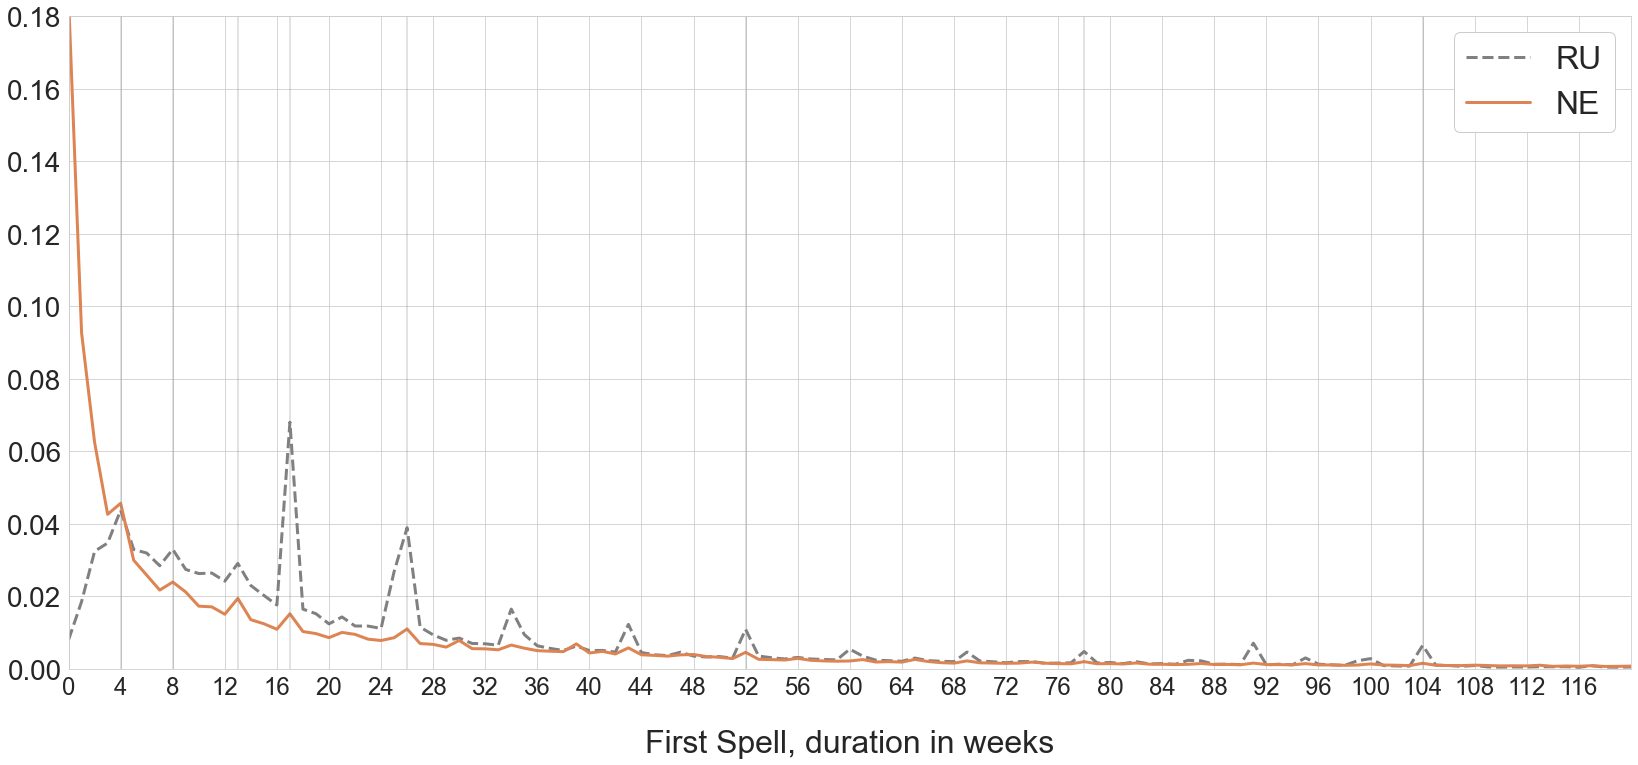

In [80]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)

cls = list(sns.color_palette())

plt.plot(data_31,  lw=3, label='RU',ls='--',c='grey')
# plt.plot(data_21,lw=3, label='LTU')
# plt.plot(data_stu, lw= 3.5, label='STU Expansion', ) #c='red' 
plt.plot(data_ne, lw= 3, label='NE',c=cls[1]) #c='darkorange'

plt.legend(loc='best', framealpha=1.0, fontsize=32)
# plt.xticks(spikes,fontsize=28)
plt.xticks(np.arange(0,120,4),fontsize=24)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='grey', alpha=.3)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32, labelpad=30 )
plt.ylim(0,0.18)

plt.savefig("./plots/NE_spells_histogram.eps", format="eps", bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


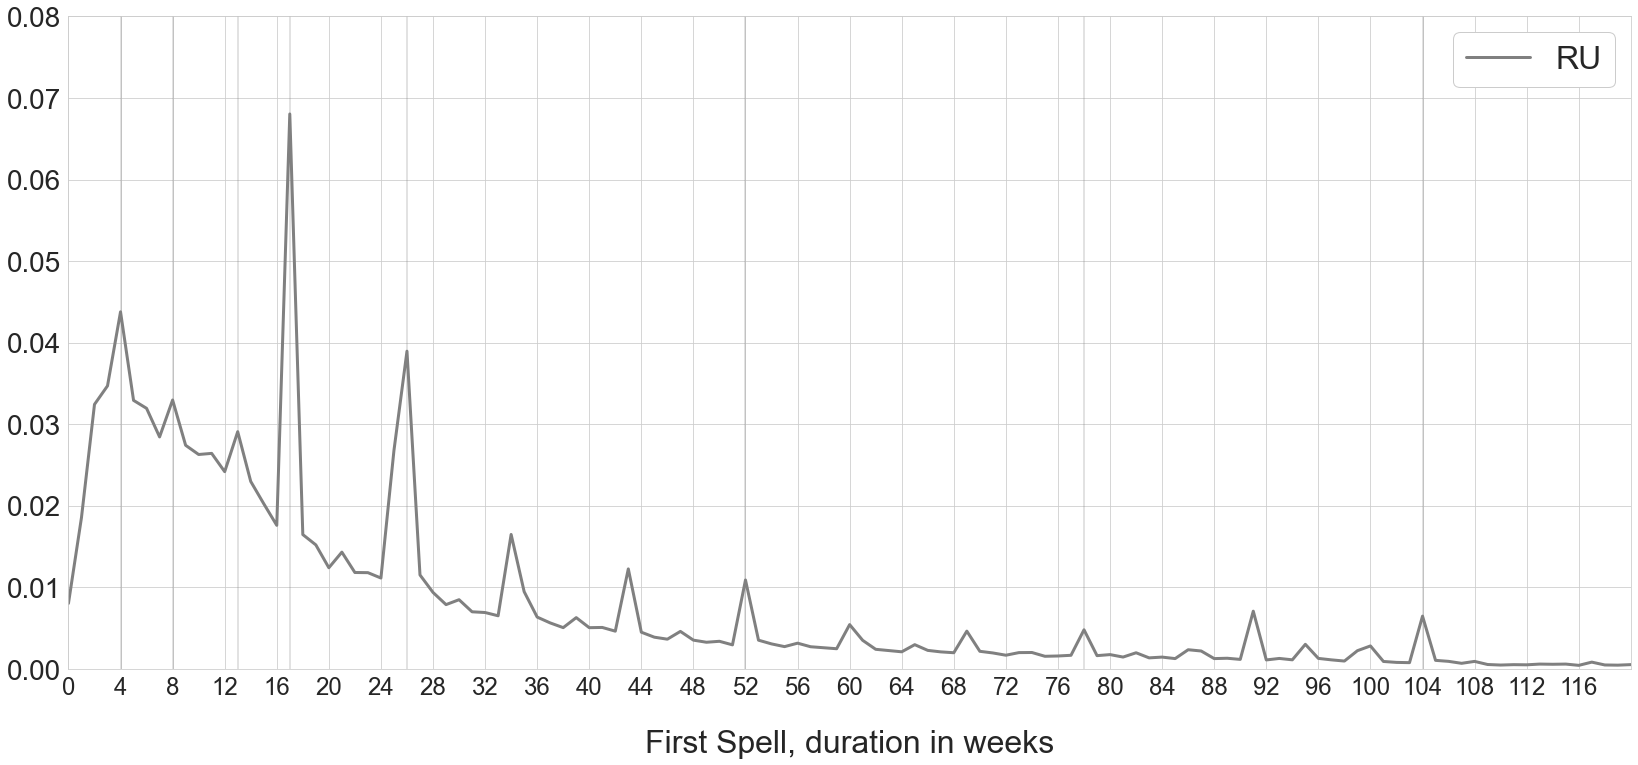

In [81]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)

plt.plot(data_31,  lw=3, label='RU', c='grey') #
# plt.plot(data_21,lw=3, label='LTU Expansion',ls='--')
# plt.plot(data_stu, lw= 3.5, label='STU Expansion', ) #c='red' 
# plt.plot(data_ne, lw= 3, label='Non-Employment',ls='-.') #c='darkorange'

plt.legend(loc='best', framealpha=1.0, fontsize=32)
# plt.xticks(spikes,fontsize=28)
plt.xticks(np.arange(0,120,4),fontsize=24)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='grey', alpha=.3)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32, labelpad=30 )
plt.ylim(0,0.08)

plt.savefig("./plots/RU_only_histogram.eps", format="eps", bbox_inches='tight')

plt.show()

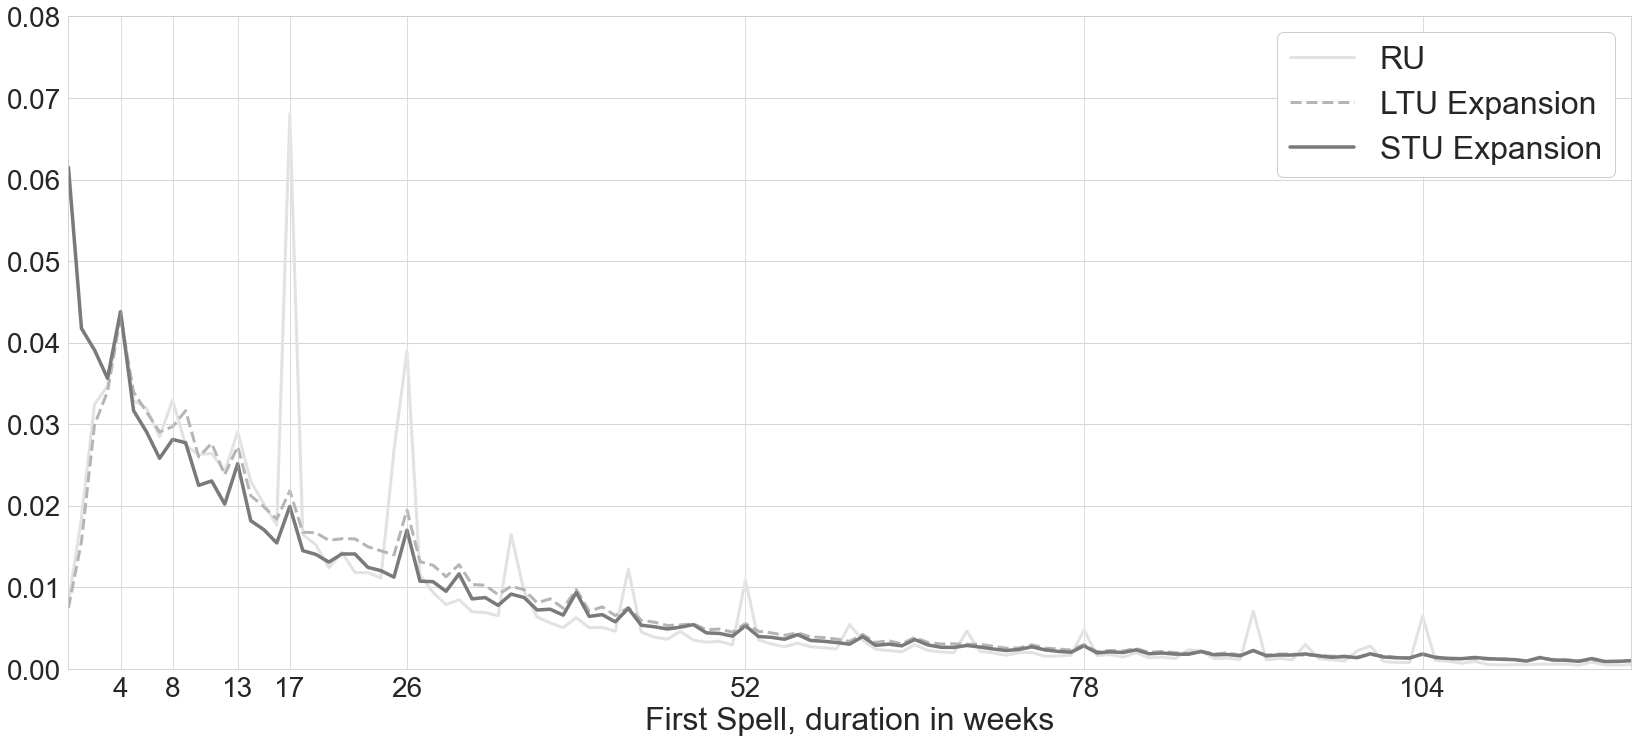

In [13]:
sns.set_palette('Greys',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)

plt.plot(data_31,  lw=3, label='RU') #c='grey'
plt.plot(data_21,lw=3, label='LTU Expansion',ls='--')
plt.plot(data_stu, lw= 3.5, label='STU Expansion', ) #c='red' 
# plt.plot(data_ne, lw= 3, label='Non-Employment',ls='-.') #c='darkorange'

plt.legend(loc='best', framealpha=1.0, fontsize=32)
plt.xticks(spikes,fontsize=28)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32 )
plt.ylim(0,0.08)

plt.savefig("Add2_spikes_bw.png", format="png", bbox_inches='tight')

plt.show()

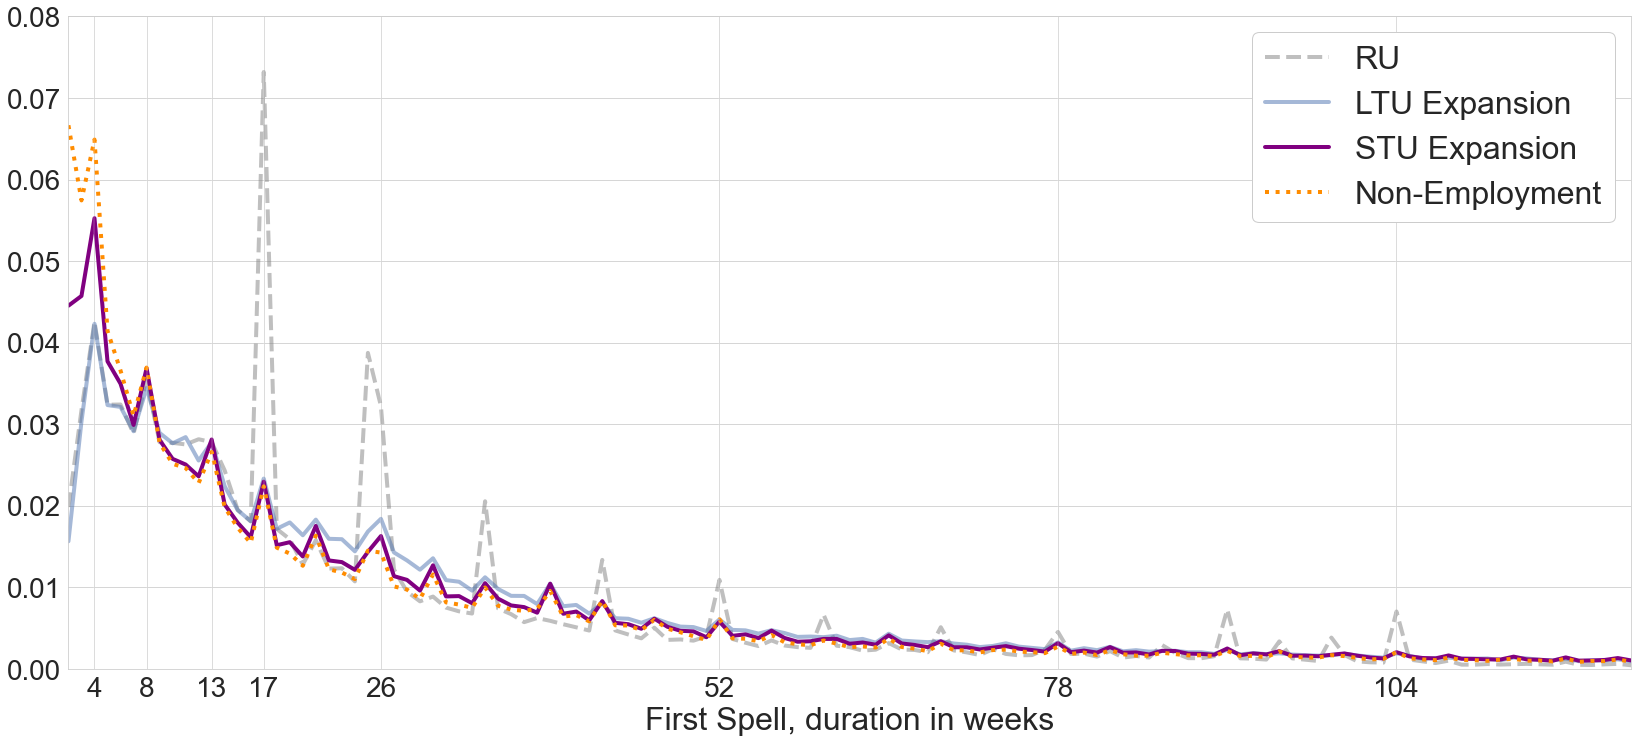

In [92]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = np.array((4,8,13,17,26,52,78,104)) - 2

plt.plot(data_31,  lw=4, label='RU',c='grey',ls='--',alpha=0.5)
plt.plot(data_21,lw=4, label='LTU Expansion',alpha=0.5)
plt.plot(data_stu, lw= 4, label='STU Expansion', c='purple'  )
plt.plot(data_ne, lw= 4, label='Non-Employment',ls=':',c='darkorange')

plt.legend(loc='best', framealpha=1.0, fontsize=32)
plt.xticks(spikes,spikes+2,fontsize=28)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32 )
plt.ylim(0,0.08)

# plt.savefig("plots/Add2_spikes.eps", format="eps", bbox_inches='tight')
# plt.savefig("Add2_spikes_bw.png", format="png", bbox_inches='tight')
# plt.savefig("plots/NE_only_histogram.pdf", format="pdf", bbox_inches='tight')

plt.show()

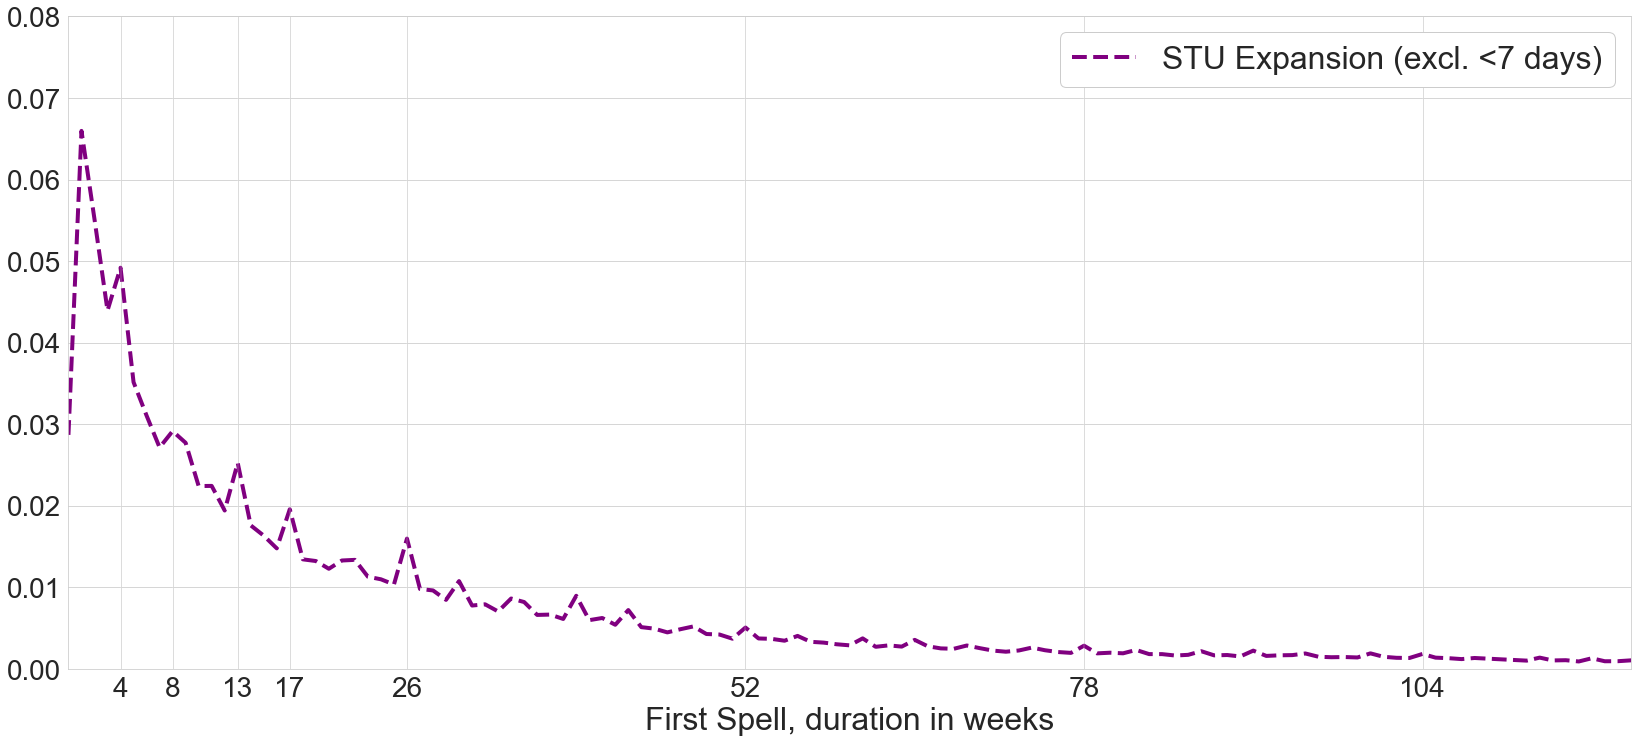

In [22]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)

# plt.plot(data_31,  lw=4, label='RU',c='grey',ls='--',alpha=0.5)
# plt.plot(data_21,lw=4, label='LTU Expansion',alpha=0.5)
# plt.plot(data_stu, lw= 4, label='STU Expansion', c='purple'  )
plt.plot(data_stu_7, lw= 4, label='STU Expansion (excl. <7 days)', c='purple',ls='--'  )
# plt.plot(data_ne, lw= 4, label='Non-Employment',ls=':',c='darkorange')

plt.legend(loc='best', framealpha=1.0, fontsize=32)
plt.xticks(spikes,fontsize=28)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32 )
plt.ylim(0,0.08)

# plt.savefig("plots/Add2_spikes.eps", format="eps", bbox_inches='tight')
# plt.savefig("Add2_spikes_bw.png", format="png", bbox_inches='tight')
# plt.savefig("plots/NE_only_histogram.pdf", format="pdf", bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

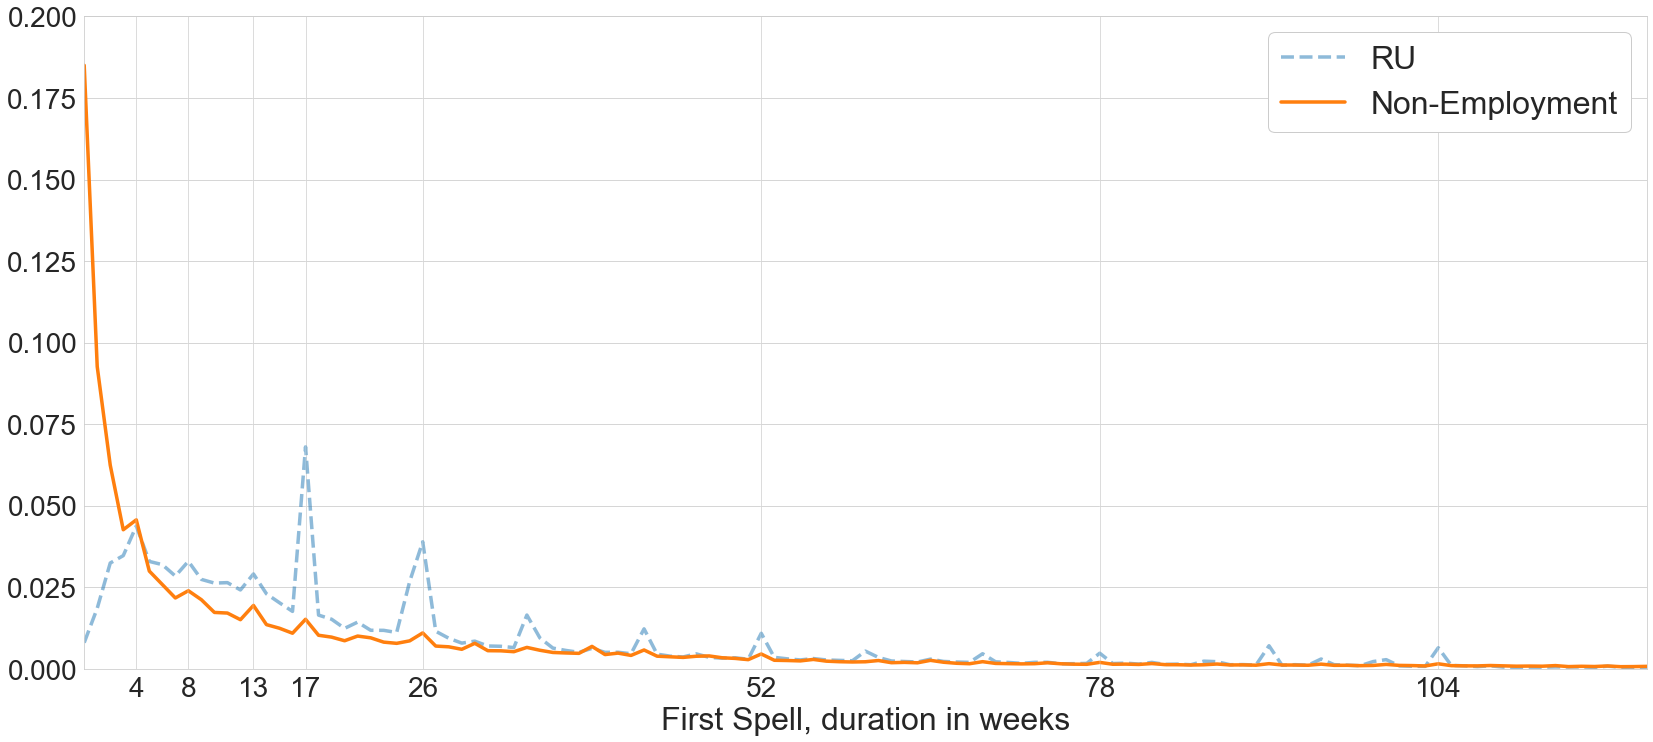

In [14]:
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)
plt.plot(data_31,  lw=3.5, label='RU',ls='--',alpha=0.5)
plt.plot(data_ne,lw=3.5, label='Non-Employment')

plt.legend(loc='best', framealpha=1.0, fontsize=32)
plt.xticks(spikes,fontsize=28)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32 )
plt.ylim(0,0.2)

plt.savefig("plots/NE_spells_histogram.eps", format="eps", bbox_inches='tight')

plt.show()

# First and Second Spells

/Users/cristina/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


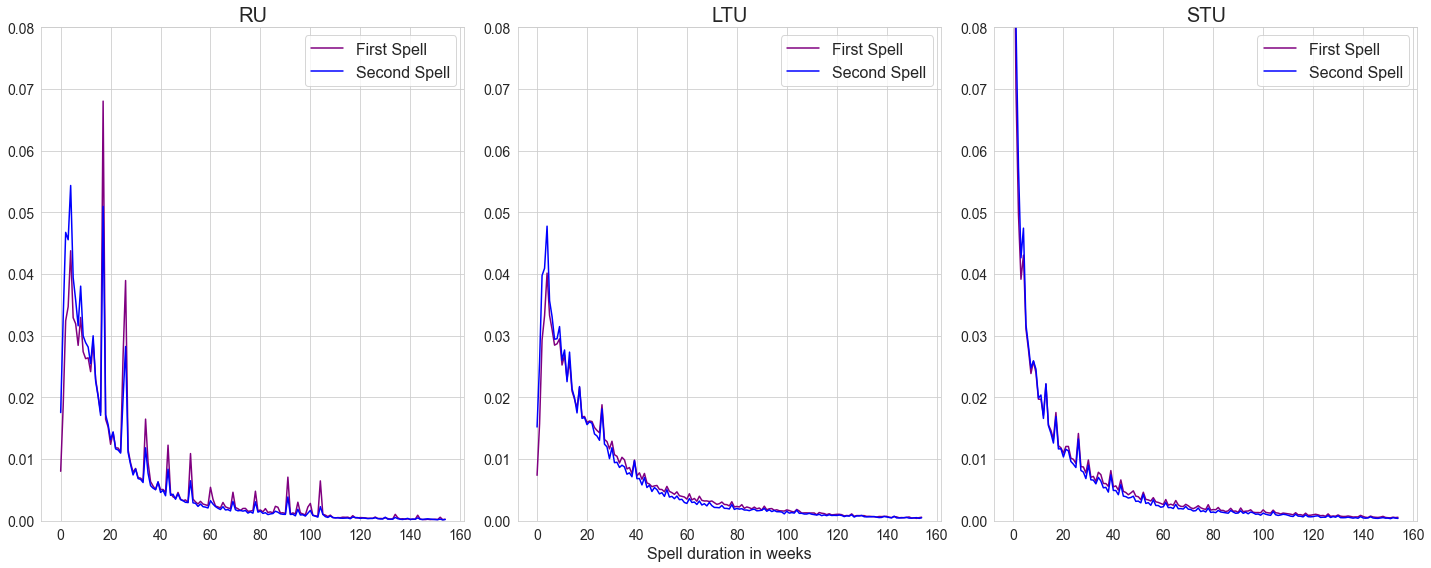

In [32]:
plt.figure(figsize=(20,8))
#plt.suptitle('Hazard rate by Spell Number', fontsize=22)
plt.subplot(131)
plt.plot(data_31, c= 'purple', label='First Spell')
plt.plot(data_32, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('RU', fontsize=20)
plt.ylim(0,0.08)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(132)
plt.plot(data_21, c='purple', label='First Spell')
plt.plot(data_22, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('LTU', fontsize=20)
plt.ylim(0,0.08)
plt.xlabel('Spell duration in weeks',fontsize=16 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(133)
plt.plot(data_stu, c='purple', label='First Spell')
plt.plot(data_stu2, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('STU', fontsize=20)
plt.ylim(0,0.08)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("plots/n_spell.eps", format='eps', box_inches='tight')

plt.show()

/Users/cristina/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artist

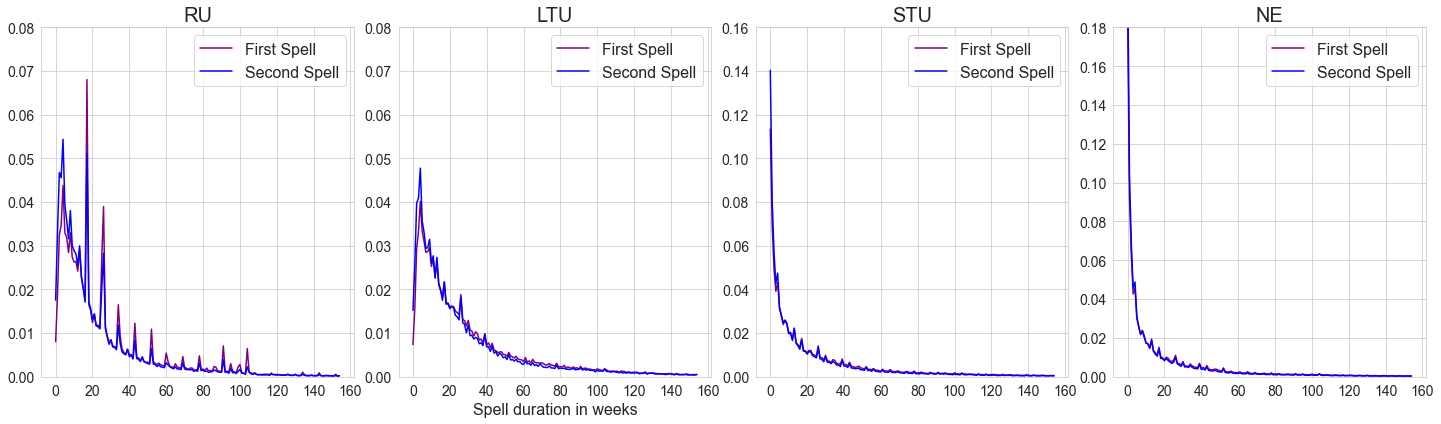

In [37]:
plt.figure(figsize=(20,6))
#plt.suptitle('Hazard rate by Spell Number', fontsize=22)
plt.subplot(141)
plt.plot(data_31, c= 'purple', label='First Spell')
plt.plot(data_32, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('RU', fontsize=20)
plt.ylim(0,0.08)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(142)
plt.plot(data_21, c='purple', label='First Spell')
plt.plot(data_22, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('LTU', fontsize=20)
plt.ylim(0,0.08)
plt.xlabel('Spell duration in weeks',fontsize=16 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(143)
plt.plot(data_stu, c='purple', label='First Spell')
plt.plot(data_stu2, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('STU', fontsize=20)
plt.ylim(0,0.16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(144)
plt.plot(data_ne, c='purple', label='First Spell')
plt.plot(data_ne2, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('NE', fontsize=20)
plt.ylim(0,0.18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("plots/n_spell_ne.eps", format='eps', box_inches='tight')

plt.show()